#Import Libraries 

In [39]:
import os


import pandas as pd
import numpy as np
from scipy.stats import normaltest,shapiro
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Here, I've imported 3 types of Libraries

a) Inbuilt Library


b) Third-Party Library


c) Skitlearn Library

# Load Dataset

In [2]:
df = pd.read_csv('221202_seqana_data_science_working_student_challenge_dataset.csv')
df.head()

,year,dem_nasa_dem30,dem_merit,dem_gmted,dem_srtm90_v4,dem_nasa_srtm30,dem_usgs_ned,terrain_topo_div_alos_constant,terrain_mtpi_alos_AVE,terrain_chili_alos_constant,...,sur_refl_b02_mean_sampling_year,sur_refl_b03_mean_sampling_year,sur_refl_b07_mean_sampling_year,evi_std_sampling_year,ndvi_std_sampling_year,sur_refl_b01_std_sampling_year,sur_refl_b02_std_sampling_year,sur_refl_b03_std_sampling_year,sur_refl_b07_std_sampling_year,soc_stock_t_ha
0,2012,894,899.792969,898,892,894,895.900574,0.306919,-4,183,...,3374.608696,1089.260870,1546.869565,1574.503874,2215.650847,1688.021295,1375.511632,1220.169482,654.961158,68.793925
1,2011,61,56.898190,58,58,57,58.000286,0.123088,-7,181,...,2709.608696,374.478261,1166.391304,1582.043952,1427.600306,307.310126,999.502956,167.002686,501.502718,87.265779
2,2011,92,92.471191,89,91,90,92.729630,0.046061,-1,181,...,3195.043478,414.347826,1221.347826,1927.965549,1960.699712,583.722087,1090.225101,322.372259,434.762277,96.650384
3,2011,1560,1572.300049,1622,1570,1549,1547.678345,0.781243,-17,160,...,4063.727273,1790.043478,928.956522,1010.631962,1903.293570,2179.134552,2019.112468,1884.017720,472.453507,68.400738
4,2011,1176,1175.498901,1179,1176,1176,1170.957031,0.210475,-2,181,...,2652.260870,1022.217391,864.565217,646.826519,1687.594992,922.467112,857.199362,1366.888502,303.002824,35.314235


Load the dataset files with csv extension from the dataset folder.

# Exploratory Data Analysis(EDA)

### Normality

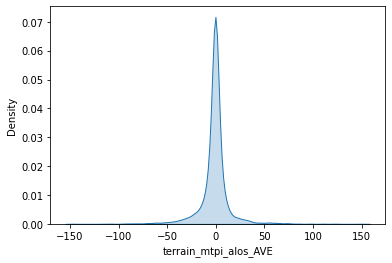

In [3]:
sns.kdeplot(df['terrain_mtpi_alos_AVE'], fill = True)

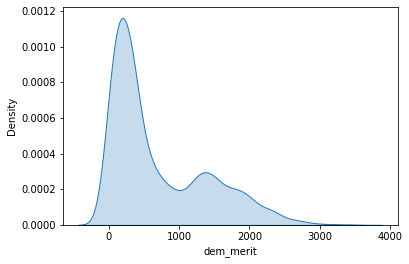

In [4]:
sns.kdeplot(df['dem_merit'], fill = True)

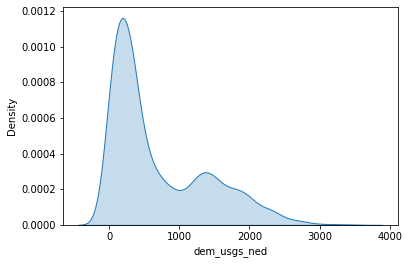

In [5]:
sns.kdeplot(df['dem_usgs_ned'], fill = True)

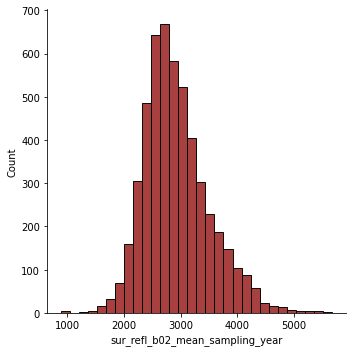

In [6]:
sns.displot(df['sur_refl_b02_mean_sampling_year'],color='darkred',bins=30)

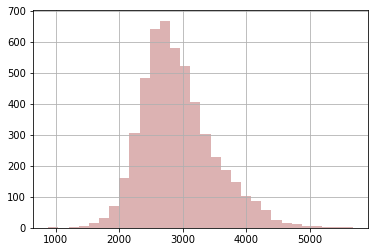

In [7]:
df['sur_refl_b02_mean_sampling_year'].hist(color='darkred',bins=30,alpha=0.3)

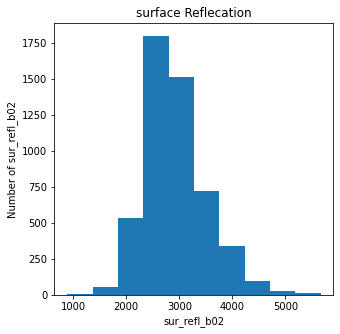

In [8]:
plt.figure(figsize=(5,5))
plt.hist(df['sur_refl_b02_mean_sampling_year'])
plt.title('surface Reflecation')
plt.xlabel('sur_refl_b02')
plt.ylabel('Number of sur_refl_b02')
plt.show()

## Outlier's Detection

### Normaltest & Shapiro

In [10]:
status,p_val = normaltest(df['soil_grids_soc_5_15'])
print('p value is :', p_val)
if p_val.all() > 0.05:
    print('Null hypothesis >> Data is Normally Distributed')
else:
    print('Alternate Hypothesis >> Data is not Normally distributed')

p value is : 0.0
Alternate Hypothesis >> Data is not Normally distributed


In [11]:
_,p_val = shapiro(df)
print('p value is :', p_val)
if p_val > 0.05:
     print('Null hypothesis >> Data is Normally Distributed')
else:
    print('Alternate Hypothesis >> Data is not Normally distributed')

p value is : 0.0
Alternate Hypothesis >> Data is not Normally distributed


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Z-Score Test

In [12]:
mean = df['terrain_mtpi_alos_AVE'].mean()
std = df['terrain_mtpi_alos_AVE'].std()
print('mean: ', mean)
print('std: ', std)

mean:  -1.4720094284030643
std:  15.52330627128295


In [13]:
threshold = 3
outliers = []
for val in df['terrain_mtpi_alos_AVE']:
    z_score = (val - mean)/std
    if np.abs(z_score) > threshold:
        outliers.append(val)
        
print('Detected Outliers are:',outliers)

Detected Outliers are: [-59, 63, -81, 54, -62, 55, -63, -69, -60, 76, -71, 46, -49, -57, -54, -97, 59, -53, 48, 58, 124, 46, 109, 74, 86, -71, 55, 62, -52, 47, 54, -54, -70, -49, -146, -56, -67, 74, -53, 69, -55, 86, 82, -91, -65, 65, 150, 47, 65, -70, 70, 57, -66, -53, 50, 62, -78, 53, 96, 55, -63, 55, -50, -49, -64, 50, -52, 75, -54, 121, 63, 47, 74, 64, -87, 72, -78, -50, -107, -61, -84, -60, 52, -69, 62, 65, 56, -58, -72, 53, -50, -60, 47, -49, 72, -88, -92, -61, -79, 48, -76, 98, 56, 54, 52, -73, 52, 112, -64, -51, -115, -56, -63, -55, -69, 57, 58, 62, 58, 47, 78, -82, -66, -84, -58, 48, -52, -95, -109, 55, -89, 65, -57, -62, -51, 71, -61, 62, 62]


### IQR Method

In [14]:
q1 = df['terrain_mtpi_alos_AVE'].quantile(0.25)
q2 = df['terrain_mtpi_alos_AVE'].quantile(0.5)
q3 = df['terrain_mtpi_alos_AVE'].quantile(0.75)
print(f'1st Quartile  >> 25th percentile of the data = {q1}')
print(f'2nd Quartile  >> 50th percentile of the data = {q3}')
print(f'3rd Quartile  >> 75th percentile of the data = {q3}')
print('*'*112)

iqr = q3 - q1
print('Inter Quartile Range(IQR): ', iqr)
print('*'*112)

lower_tail = q1 - 3 * iqr #Extreme Outliers
upper_tail = q3 + 3 * iqr #Extreme Outliers
print('Lower tail is :',lower_tail)
print('Upper tail is :',upper_tail)

1st Quartile  >> 25th percentile of the data = -4.0
2nd Quartile  >> 50th percentile of the data = 2.0
3rd Quartile  >> 75th percentile of the data = 2.0
****************************************************************************************************************
Inter Quartile Range(IQR):  6.0
****************************************************************************************************************
Lower tail is : -22.0
Upper tail is : 20.0


In [15]:
for i in range(len(df)):
    df.loc[i,'terrain_mtpi_alos_AVE']
    if (i > q1+(1.5*iqr)) or (i < q1-(1.5*iqr)):
        print(i)

Streaming output truncated to the last 5000 lines.
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
33

## Boxplot Method

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


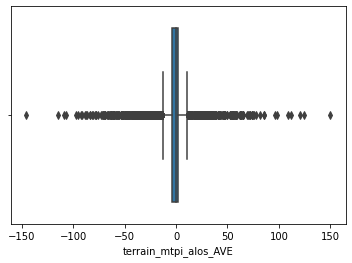

In [16]:
sns.boxplot(df['terrain_mtpi_alos_AVE'])

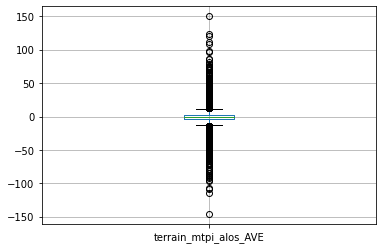

In [17]:
df.boxplot('terrain_mtpi_alos_AVE')

Took another Feature Attribute and apply IQR Method

In [18]:
q1 = df['dem_merit'].quantile(0.25)
q2 = df['dem_merit'].quantile(0.5)
q3 = df['dem_merit'].quantile(0.75)
print(f'1st Quartile  >> 25th percentile of the data = {q1}')
print(f'2nd Quartile  >> 50th percentile of the data = {q3}')
print(f'3rd Quartile  >> 75th percentile of the data = {q3}')
print('*'*112)

iqr = q3 - q1
print('Inter Quartile Range(IQR): ', iqr)
print('*'*112)

lower_tail = q1 - 3 * iqr #Extreme Outliers
upper_tail = q3 + 3 * iqr #Extreme Outliers
print('Lower tail is :',lower_tail)
print('Upper tail is :',upper_tail)

1st Quartile  >> 25th percentile of the data = 177.08223724365251
2nd Quartile  >> 50th percentile of the data = 1228.77691650391
3rd Quartile  >> 75th percentile of the data = 1228.77691650391
****************************************************************************************************************
Inter Quartile Range(IQR):  1051.6946792602573
****************************************************************************************************************
Lower tail is : -2978.0018005371194
Upper tail is : 4383.860954284682


In [19]:
for i in range(len(df)):
    df.loc[i,'dem_merit']
    if (i > q1+(1.5*iqr)) or (i < q1-(1.5*iqr)):
        print(i)

1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


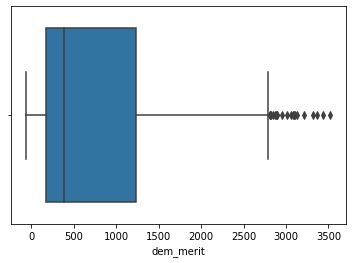

In [20]:
sns.boxplot(df['dem_merit'])

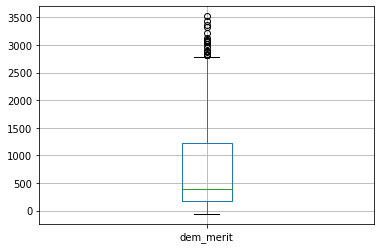

In [21]:
df.boxplot('dem_merit')

In [22]:
df.describe()

,year,dem_nasa_dem30,dem_merit,dem_gmted,dem_srtm90_v4,dem_nasa_srtm30,dem_usgs_ned,terrain_topo_div_alos_constant,terrain_mtpi_alos_AVE,terrain_chili_alos_constant,...,sur_refl_b02_mean_sampling_year,sur_refl_b03_mean_sampling_year,sur_refl_b07_mean_sampling_year,evi_std_sampling_year,ndvi_std_sampling_year,sur_refl_b01_std_sampling_year,sur_refl_b02_std_sampling_year,sur_refl_b03_std_sampling_year,sur_refl_b07_std_sampling_year,soc_stock_t_ha
count,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,...,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000
mean,2011.011589,703.000982,702.989512,704.887056,704.098409,704.304066,702.360047,0.171150,-1.472009,196.266352,...,2926.502814,934.478293,1443.624366,1276.086012,1630.338114,1065.661213,1068.488921,1036.451850,453.205834,69.399018
std,0.285303,689.395483,689.818076,689.329857,689.650488,689.572815,689.939886,0.173190,15.523306,19.435374,...,576.318969,709.491148,646.012703,669.566579,828.002647,1005.472648,618.375897,1079.210268,197.820808,67.241177
min,2011.000000,-64.000000,-62.485870,-62.000000,-64.000000,-64.000000,-64.751762,0.006211,-146.000000,65.000000,...,884.869565,57.043478,209.086957,43.458035,32.174549,44.805950,121.464499,25.795410,72.230034,0.178608
25%,2011.000000,178.500000,177.082237,179.000000,179.000000,179.000000,177.300896,0.058714,-4.000000,184.000000,...,2531.978261,382.565217,991.347826,716.760909,970.811955,222.691322,588.573861,107.901579,305.694851,30.201763
50%,2011.000000,383.000000,382.266815,384.000000,383.000000,381.000000,381.222198,0.103695,0.000000,199.000000,...,2842.695652,736.913043,1322.608696,1264.965743,1594.603804,639.540645,924.875167,649.356386,415.923707,49.241095
75%,2011.000000,1228.000000,1228.776917,1230.000000,1229.000000,1228.500000,1229.918152,0.212986,2.000000,210.000000,...,3244.173913,1234.739130,1741.195652,1831.894627,2293.518117,1741.368234,1392.175076,1767.075432,572.038427,82.367462
max,2019.000000,3531.000000,3521.041748,3523.000000,3580.000000,3536.000000,3522.890137,1.000000,150.000000,252.000000,...,5668.818182,4272.304348,4684.826087,3406.645239,3559.256708,3867.800669,3193.912846,4049.046509,1249.752010,497.756299


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


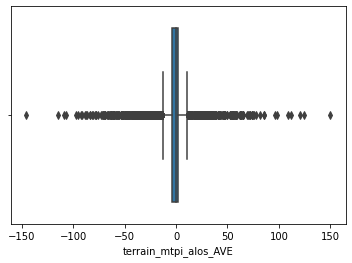

In [23]:
sns.boxplot(df['terrain_mtpi_alos_AVE'])

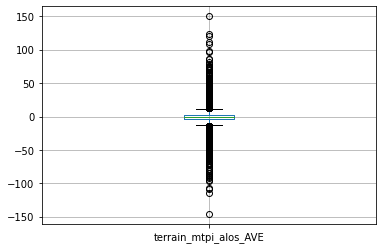

In [24]:
df.boxplot('terrain_mtpi_alos_AVE')

## Feature Selection

### Correlation Method

In [57]:
correlation = df.corr()['soc_stock_t_ha']
correlation

year                             -0.011524
dem_nasa_dem30                   -0.138790
dem_merit                        -0.139830
dem_gmted                        -0.140070
dem_srtm90_v4                    -0.139213
                                    ...   
sur_refl_b01_std_sampling_year    0.085911
sur_refl_b02_std_sampling_year    0.123277
sur_refl_b03_std_sampling_year    0.090934
sur_refl_b07_std_sampling_year   -0.156879
soc_stock_t_ha                    1.000000
Name: soc_stock_t_ha, Length: 306, dtype: float64

Checked correlation of target/dependent labels with dependent features.

In [62]:
correlate_features = correlation.sort_values(ascending=False)[:15]
correlate_features_15 = correlation.sort_values(ascending=True)[:15]

In [63]:
correlate_features

soc_stock_t_ha              1.000000
soil_grids_soc_5_15         0.518204
soil_grids_soc_0_5          0.496673
soil_grids_ocd_5_15         0.491073
soil_grids_nitrogen_0_5     0.480961
soil_olm_soc_b0             0.477840
soil_grids_ocd_0_5          0.464519
soil_olm_soc_b10            0.455652
soil_grids_ocs_0_30         0.449386
soil_grids_soc_15_30        0.424652
soil_grids_cec_0_5          0.422813
soil_grids_ocd_15_30        0.417715
ndvi_06_mean                0.405035
soil_grids_nitrogen_5_15    0.403428
ndvi_07_mean                0.379745
Name: soc_stock_t_ha, dtype: float64

In [64]:
correlate_features_15

LST_Day_1km_09_mean               -0.429938
soil_grids_bdod_0_5               -0.421880
LST_Day_1km_08_mean               -0.420473
LST_Day_1km_06_mean               -0.415369
sur_refl_b01_06_mean              -0.409271
LST_Day_1km_07_mean               -0.407711
sur_refl_b07_mean_sampling_year   -0.403296
sur_refl_b07_06_mean              -0.402197
sur_refl_b07_07_mean              -0.396950
sur_refl_b07_08_mean              -0.390672
sur_refl_b03_06_mean              -0.390614
sur_refl_b07_02_mean              -0.389870
sur_refl_b01_07_mean              -0.388929
sur_refl_b07_09_mean              -0.387726
LST_Day_1km_05_mean               -0.387510
Name: soc_stock_t_ha, dtype: float64

In [65]:
# df = df[['soil_grids_soc_5_15', 'soil_grids_soc_0_5', 'soil_grids_ocd_5_15', 
#    'soil_grids_nitrogen_0_5', 'soil_olm_soc_b0', 'soil_grids_ocd_0_5', 
#    'soil_olm_soc_b10','soil_grids_ocs_0_30','sur_refl_b07_06_mean', 'sur_refl_b07_mean_sampling_year',
#    'LST_Day_1km_07_mean', 'sur_refl_b01_06_mean', 'LST_Day_1km_06_mean', 'LST_Day_1km_08_mean', 
#    'soil_grids_bdod_0_5', 'LST_Day_1km_09_mean', 'soc_stock_t_ha' ]]

I could have done dimensionality reduction by selecting best correlated 25-30 features for model training. But later I am using PCA algorithm for dimensionality reduction.

In [25]:
# plt.figure(figsize = (80,20))
# sns.heatmap(df.corr(), annot = True)

### Missing Value Ratio Method

In [26]:
missing_val = (df.isna().sum())/df.shape[0] * 100
missing_val.sort_values(ascending = False)

year                    0.0
sur_refl_b01_03_mean    0.0
sur_refl_b01_06_std     0.0
sur_refl_b01_06_mean    0.0
sur_refl_b01_05_std     0.0
                       ... 
LST_Day_1km_03_mean     0.0
LST_Day_1km_02_std      0.0
LST_Day_1km_02_mean     0.0
LST_Day_1km_01_std      0.0
soc_stock_t_ha          0.0
Length: 306, dtype: float64

In [66]:
df.isna().sum().sum()

0

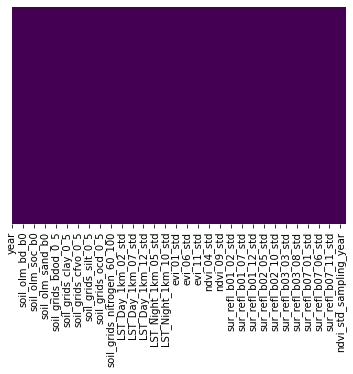

In [67]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Here, We do not have any missing values.

In [27]:
df.describe()

,year,dem_nasa_dem30,dem_merit,dem_gmted,dem_srtm90_v4,dem_nasa_srtm30,dem_usgs_ned,terrain_topo_div_alos_constant,terrain_mtpi_alos_AVE,terrain_chili_alos_constant,...,sur_refl_b02_mean_sampling_year,sur_refl_b03_mean_sampling_year,sur_refl_b07_mean_sampling_year,evi_std_sampling_year,ndvi_std_sampling_year,sur_refl_b01_std_sampling_year,sur_refl_b02_std_sampling_year,sur_refl_b03_std_sampling_year,sur_refl_b07_std_sampling_year,soc_stock_t_ha
count,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,...,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000
mean,2011.011589,703.000982,702.989512,704.887056,704.098409,704.304066,702.360047,0.171150,-1.472009,196.266352,...,2926.502814,934.478293,1443.624366,1276.086012,1630.338114,1065.661213,1068.488921,1036.451850,453.205834,69.399018
std,0.285303,689.395483,689.818076,689.329857,689.650488,689.572815,689.939886,0.173190,15.523306,19.435374,...,576.318969,709.491148,646.012703,669.566579,828.002647,1005.472648,618.375897,1079.210268,197.820808,67.241177
min,2011.000000,-64.000000,-62.485870,-62.000000,-64.000000,-64.000000,-64.751762,0.006211,-146.000000,65.000000,...,884.869565,57.043478,209.086957,43.458035,32.174549,44.805950,121.464499,25.795410,72.230034,0.178608
25%,2011.000000,178.500000,177.082237,179.000000,179.000000,179.000000,177.300896,0.058714,-4.000000,184.000000,...,2531.978261,382.565217,991.347826,716.760909,970.811955,222.691322,588.573861,107.901579,305.694851,30.201763
50%,2011.000000,383.000000,382.266815,384.000000,383.000000,381.000000,381.222198,0.103695,0.000000,199.000000,...,2842.695652,736.913043,1322.608696,1264.965743,1594.603804,639.540645,924.875167,649.356386,415.923707,49.241095
75%,2011.000000,1228.000000,1228.776917,1230.000000,1229.000000,1228.500000,1229.918152,0.212986,2.000000,210.000000,...,3244.173913,1234.739130,1741.195652,1831.894627,2293.518117,1741.368234,1392.175076,1767.075432,572.038427,82.367462
max,2019.000000,3531.000000,3521.041748,3523.000000,3580.000000,3536.000000,3522.890137,1.000000,150.000000,252.000000,...,5668.818182,4272.304348,4684.826087,3406.645239,3559.256708,3867.800669,3193.912846,4049.046509,1249.752010,497.756299


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Columns: 306 entries, year to soc_stock_t_ha
dtypes: float64(212), int64(94)
memory usage: 11.9 MB


Here, We do not have any categorical data. So, we need not to perform OneHotEncoding Task.

In [29]:
for i in list(df.select_dtypes(include='object')):
    print(True)
else:
    print(False)

False


In [30]:
list(df.select_dtypes(include='object'))

[]

In [31]:
list(df.select_dtypes(include='float'))

['dem_merit',
 'dem_usgs_ned',
 'terrain_topo_div_alos_constant',
 'LST_Day_1km_01_mean',
 'LST_Day_1km_01_std',
 'LST_Day_1km_02_mean',
 'LST_Day_1km_02_std',
 'LST_Day_1km_03_mean',
 'LST_Day_1km_03_std',
 'LST_Day_1km_04_mean',
 'LST_Day_1km_04_std',
 'LST_Day_1km_05_mean',
 'LST_Day_1km_05_std',
 'LST_Day_1km_06_mean',
 'LST_Day_1km_06_std',
 'LST_Day_1km_07_mean',
 'LST_Day_1km_07_std',
 'LST_Day_1km_08_mean',
 'LST_Day_1km_08_std',
 'LST_Day_1km_09_mean',
 'LST_Day_1km_09_std',
 'LST_Day_1km_10_mean',
 'LST_Day_1km_10_std',
 'LST_Day_1km_11_mean',
 'LST_Day_1km_11_std',
 'LST_Day_1km_12_mean',
 'LST_Day_1km_12_std',
 'LST_Night_1km_01_mean',
 'LST_Night_1km_01_std',
 'LST_Night_1km_02_mean',
 'LST_Night_1km_02_std',
 'LST_Night_1km_03_mean',
 'LST_Night_1km_03_std',
 'LST_Night_1km_04_mean',
 'LST_Night_1km_04_std',
 'LST_Night_1km_05_mean',
 'LST_Night_1km_05_std',
 'LST_Night_1km_06_mean',
 'LST_Night_1km_06_std',
 'LST_Night_1km_07_mean',
 'LST_Night_1km_07_std',
 'LST_Night_1

In [32]:
list(df.select_dtypes(include='int'))

['year',
 'dem_nasa_dem30',
 'dem_gmted',
 'dem_srtm90_v4',
 'dem_nasa_srtm30',
 'terrain_mtpi_alos_AVE',
 'terrain_chili_alos_constant',
 'soil_olm_bd_b0',
 'soil_olm_bd_b10',
 'soil_olm_bd_b30',
 'soil_olm_bd_b60',
 'soil_olm_bd_b100',
 'soil_olm_clay_b0',
 'soil_olm_clay_b10',
 'soil_olm_clay_b30',
 'soil_olm_clay_b60',
 'soil_olm_clay_b100',
 'soil_olm_soc_b0',
 'soil_olm_soc_b10',
 'soil_olm_soc_b30',
 'soil_olm_soc_b60',
 'soil_olm_soc_b100',
 'soil_olm_ph_b0',
 'soil_olm_ph_b10',
 'soil_olm_ph_b30',
 'soil_olm_ph_b60',
 'soil_olm_ph_b100',
 'soil_olm_sand_b0',
 'soil_olm_sand_b10',
 'soil_olm_sand_b30',
 'soil_olm_sand_b60',
 'soil_olm_sand_b100',
 'soil_olm_water_content_b0',
 'soil_olm_water_content_b10',
 'soil_olm_water_content_b30',
 'soil_olm_water_content_b60',
 'soil_olm_water_content_b100',
 'soil_grids_bdod_0_5',
 'soil_grids_bdod_5_15',
 'soil_grids_bdod_15_30',
 'soil_grids_bdod_30_60',
 'soil_grids_bdod_60_100',
 'soil_grids_cec_0_5',
 'soil_grids_cec_5_15',
 'soil_

In [33]:
df.columns

Index(['year', 'dem_nasa_dem30', 'dem_merit', 'dem_gmted', 'dem_srtm90_v4',
       'dem_nasa_srtm30', 'dem_usgs_ned', 'terrain_topo_div_alos_constant',
       'terrain_mtpi_alos_AVE', 'terrain_chili_alos_constant',
       ...
       'sur_refl_b02_mean_sampling_year', 'sur_refl_b03_mean_sampling_year',
       'sur_refl_b07_mean_sampling_year', 'evi_std_sampling_year',
       'ndvi_std_sampling_year', 'sur_refl_b01_std_sampling_year',
       'sur_refl_b02_std_sampling_year', 'sur_refl_b03_std_sampling_year',
       'sur_refl_b07_std_sampling_year', 'soc_stock_t_ha'],
      dtype='object', length=306)

# Data Splitting

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print('shape of df_train', df_train.shape)
print('shape of df_test', df_test.shape)

shape of df_train (4072, 306)
shape of df_test (1019, 306)


To prevent the problem of data leakage, we divided the data at the very beginning of the task. When the information that we use to train a machine learning algorithm is present in the training data, this is referred to as data leakage in machine learning. As a result, we divide the testing data from the training data (used to train the model) (To predict the data outcome).

In [7]:
X_train =  df_train.drop(['soc_stock_t_ha'],axis=1)
y_train = df_train['soc_stock_t_ha']

X_test =  df_test.drop(['soc_stock_t_ha'],axis=1)
y_test = df_test['soc_stock_t_ha']


print('Shape of X_train: ',X_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (4072, 305)
Shape of y_train:  (4072,)
Shape of X_test:  (1019, 305)
Shape of y_test:  (1019,)


# Feature Engineering

## Standardization / Normalization

In [8]:
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)

Shape of X_train:  (4072, 305)
Shape of X_test:  (1019, 305)


Standardization (Z_score normalization) >> It is a Transformed version of your features. It is normal distribution with "mean = 0" & "standard deviation = 1".
Standardization = (each feature - mean of feature) / (standard deviations)

standardization is a better default option to use. Also, I checked the accuracy with Normalization but it was not impressive. Hence I choose standardization.

In [9]:
X_stand= pd.DataFrame(X_train, columns=scaler.get_feature_names_out())
X_stand

,year,dem_nasa_dem30,dem_merit,dem_gmted,dem_srtm90_v4,dem_nasa_srtm30,dem_usgs_ned,terrain_topo_div_alos_constant,terrain_mtpi_alos_AVE,terrain_chili_alos_constant,...,sur_refl_b01_mean_sampling_year,sur_refl_b02_mean_sampling_year,sur_refl_b03_mean_sampling_year,sur_refl_b07_mean_sampling_year,evi_std_sampling_year,ndvi_std_sampling_year,sur_refl_b01_std_sampling_year,sur_refl_b02_std_sampling_year,sur_refl_b03_std_sampling_year,sur_refl_b07_std_sampling_year
0,8618.215115,0.029204,0.033610,0.037983,0.043788,0.035037,0.031148,0.482900,-0.253187,9.471914,...,0.993475,5.325402,0.451301,1.745556,2.630581,2.108425,0.305514,1.415581,0.098543,1.884701
1,8618.215115,0.321246,0.324029,0.318470,0.319653,0.319716,0.323267,0.111313,0.000000,11.007900,...,1.462511,6.500071,0.920910,2.779175,3.011922,2.334963,0.571525,1.506528,0.237635,3.647155
2,8618.215115,0.091993,0.092342,0.096418,0.091955,0.091973,0.093509,0.131412,0.000000,10.751902,...,1.448291,5.007077,0.783456,2.760517,3.152196,2.599836,0.494036,1.868481,0.209467,4.659081
3,8618.215115,0.858604,0.859807,0.853149,0.861166,0.852576,0.859220,0.620420,-0.379781,8.499123,...,3.415498,7.051043,3.254072,2.470158,3.015534,3.483676,3.226003,3.693238,3.027899,3.707922
4,8618.215115,0.166464,0.166078,0.168000,0.175152,0.172267,0.161632,0.495301,0.316484,11.059099,...,0.766395,4.427772,0.435566,1.850968,0.986264,0.818765,0.131520,0.717390,0.044915,1.043187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,8618.215115,1.848626,1.846818,1.852386,1.846399,1.848222,1.847150,0.108572,0.000000,9.574313,...,1.882216,5.455929,1.254778,2.523477,3.329145,2.776160,0.996328,1.938827,1.002899,3.330368
4068,8618.215115,0.379655,0.384047,0.404662,0.380957,0.379572,0.372243,0.659676,-0.379781,10.495904,...,0.896233,5.772513,0.488405,1.918246,1.575155,1.348567,0.180650,0.929421,0.087757,1.522765
4069,8618.215115,0.397177,0.397125,0.392975,0.395553,0.394171,0.396734,0.488402,0.063297,10.035109,...,1.897967,5.833193,1.269962,2.300805,3.321435,3.008114,1.666019,2.365321,1.368605,2.841489
4070,8618.215115,2.010709,2.011875,2.016003,2.014253,2.014649,2.010559,0.624724,-0.063297,9.830310,...,1.864824,4.218080,1.571136,2.026585,1.433068,1.703661,1.352026,1.834768,1.346741,1.844400


## Dimensionality Reduction

In [10]:
pca = PCA(n_components=50)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)

Shape of X_train:  (4072, 50)
Shape of X_test:  (1019, 50)


PCA (Principle Component Analysis) algorithm  will projecting data points from one "Dth Dimensional Space" to another "Dth Dimensional Space" in order to reduce the dimensionality of the data.

The PCA algorithm will attempt to determine the principal components that have orthogonal dimensions and produce the "Highest Variance" of the data after projection from a higher dimensional.

# Model Training

### Linear Regression

In [15]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

### KNN

In [27]:
parameter_grids = {'n_neighbors' : np.arange(5,20,5),
                   'weights': ['uniform', 'distance'],
                  'leaf_size' : np.arange(2,20,2),
                   'p' : [1,2]}

model_2 = GridSearchCV(KNeighborsRegressor(n_jobs=-1),
                      param_grid=parameter_grids,
                      scoring='r2',
                      cv=5,
                      error_score='raise',
                      n_jobs=-1)

model_2.fit(X_train,y_train)

print('r2 Score of KNeighborsRegressor = {:.2f}'.format(model_2.best_score_))
print('Best found Hyperparameter of KNeighborsRegressor = {}'.format(model_2.best_params_))

r2 Score of KNeighborsRegressor = 0.38
Best found Hyperparameter of KNeighborsRegressor = {'leaf_size': 2, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


### Decision Tree Regressor

In [41]:
parameter_grids = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
                  'max_depth' : range(1,30,3), #[1,4,7...]
                  'max_features':[0.25,0.5,0.75,1.0],
                  'min_samples_split' : range(2,20,3)}

model_3 = GridSearchCV(DecisionTreeRegressor(random_state=42),
                      param_grid=parameter_grids,
                      scoring='r2',
                      cv=6,
                      n_jobs=-1)

model_3.fit(X_train,y_train)

print('r2 Score of DecisionTreeRegressor = {:.2f}'.format(model_3.best_score_))
print('Best found Hyperparameter of DecisionTreeRegressor = {}'.format(model_3.best_params_))

r2 Score of DecisionTreeRegressor = 0.24
Best found Hyperparameter of DecisionTreeRegressor = {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 0.5, 'min_samples_split': 17}


### Random Forest Regressor

In [22]:
parameter_grids = {'n_estimators' : range(100,200,50),
                   'criterion': ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
                  'max_depth' : range(2,20,3), 
                  'max_features':[0.25,0.5,0.75,1.0],
                  'min_samples_split' : range(2,15,3)}

model_4 = RandomizedSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                      param_distributions= parameter_grids,
                      n_iter= 10,
                      scoring='r2',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_4.fit(X_train,y_train)

print('r2 Score of RandomForestRegressor = {:.2f}'.format(model_4.best_score_))
print('Best found Hyperparameter of RandomForestRegressor = {}'.format(model_4.best_params_))

r2 Score of RandomForestRegressor = 0.38
Best found Hyperparameter of RandomForestRegressor = {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 0.75, 'max_depth': 14, 'criterion': 'friedman_mse'}


### AdaBoost Regressor

In [20]:
parameter_grids = {'n_estimators' : range(100,250,50),
                   'loss': ['linear', 'square', 'exponential']
                   }

model_5 = GridSearchCV(AdaBoostRegressor(random_state=42),
                      param_grid=parameter_grids,
                      scoring='r2',
                      error_score='raise',
                      cv=6,
                      n_jobs=-1)

model_5.fit(X_train,y_train)

print('r2 Score of AdaBoostRegressor = {:.2f}'.format(model_5.best_score_))
print('Best found Hyperparameter of AdaBoostRegressor = {}'.format(model_5.best_params_))

r2 Score of AdaBoostRegressor = -0.37
Best found Hyperparameter of AdaBoostRegressor = {'loss': 'square', 'n_estimators': 100}


## SVM

In [49]:
parameter_grids = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                   'C' : [0.01, 0.1, 10, 20, 30]
                   }

model_6 = GridSearchCV(SVR(),
                      param_grid=parameter_grids,
                      scoring='r2',
                      error_score='raise',
                      cv=6,
                      n_jobs=-1)

model_6.fit(X_train,y_train)

print('r2 Score of SVM = {:.2f}'.format(model_6.best_score_))
print('Best found Hyperparameter of SVM = {}'.format(model_6.best_params_))

r2 Score of SVM = 0.35
Best found Hyperparameter of SVM = {'C': 30, 'kernel': 'rbf'}


# Model Evolution

### Linear Regression Evaluation

In [52]:
y_predict_1 = model_1.predict(X_test)

#coefficient of determination: 1 >> perfect prediction
r2_score_linear = r2_score(y_test, y_predict_1)
print('r2_score for Linear Regression: ', round(r2_score_linear,3)*100, '%')

mse =  mean_absolute_error(y_test, y_predict_1)
print('MSE for Linear Regression: ', round(mse,3))

rmse= np.sqrt(mse)
print('RMSE for Linear Regression: ', round(rmse,3))

mae = mean_squared_error(y_test, y_predict_1)
print('MAE for Linear Regression: ', round(mae,3))

# variance score: 1 >> perfect prediction
print('Variance score: {}'.format(model_1.score(X_test, y_test)))

print('regression coefficients: ', model_1.coef_)  

r2_score for Linear Regression:  38.4 %
MSE for Linear Regression:  30.807
RMSE for Linear Regression:  5.55
MAE for Linear Regression:  2550.218
Variance score: 0.3835295050056068
regression coefficients:  [-1.34619025 -3.93276268  2.16809812  1.56149711  2.34883695  3.82326638
  1.73247043  2.67766307  1.77115933 -0.55764558 -1.73013856  0.79469288
 -4.25792096  0.78624236 -2.34424967  0.21324895 -0.22367645 -5.14971027
  0.9419732   1.1384906  -0.5525514  -0.37882051 -0.98103261  2.42446199
 -1.92942949 -3.25547578  1.48335753  0.86392854  0.27781309  3.99810284
 -2.81860806 -3.18987273 -3.78217982  3.8002607   2.59968483 -2.02102956
  1.73202636  4.14034949  2.62016293 -2.35095597 -1.59072161  4.27492624
 -2.94891319  1.00731938  0.09513651  5.36875837  2.54943854  3.29462375
 -0.17746188 -2.94540543]


### KNN Evaluation

In [43]:
y_predict_2 = model_2.predict(X_test)

#coefficient of determination: 1 >> perfect prediction
r2_score_knn = r2_score(y_test, y_predict_2)
print('r2_score for KNN Regression: ', round(r2_score_knn,3)*100, '%')

mse =  mean_absolute_error(y_test, y_predict_2)
print('MSE for KNN Regression: ', round(mse,3))

rmse= np.sqrt(mse)
print('RMSE for KNN Regression: ', round(rmse,3))

mae = mean_squared_error(y_test, y_predict_2)
print('MAE for KNN Regression: ', round(mae,3))

r2_score for KNN Regression:  43.0 %
MSE for KNN Regression:  28.263
RMSE for KNN Regression:  5.316
MAE for KNN Regression:  2358.009


### RandomForest Evaluation

In [46]:
y_predict_4 = model_4.predict(X_test)

#coefficient of determination: 1 >> perfect prediction
r2_score_RandomForest = r2_score(y_test, y_predict_4)
print('r2_score for RandomForest: ', round(r2_score_RandomForest,3)*100, '%')

mse =  mean_absolute_error(y_test, y_predict_4)
print('MSE for RandomForest: ', round(mse,3))

rmse= np.sqrt(mse)
print('RMSE for RandomForest: ', round(rmse,3))

mae = mean_squared_error(y_test, y_predict_4)
print('MAE for RandomForest: ', round(mae,3))

r2_score for RandomForest:  42.0 %
MSE for RandomForest:  29.941
RMSE for RandomForest:  5.472
MAE for RandomForest:  2401.411


### SVM Evaluation 

In [50]:
y_predict_6 = model_6.predict(X_test)

#coefficient of determination: 1 >> perfect prediction
r2_score_SVM = r2_score(y_test, y_predict_6)
print('r2_score for SVM: ', round(r2_score_SVM,3)*100, '%')

mse =  mean_absolute_error(y_test, y_predict_6)
print('MSE for SVM: ', round(mse,3))

rmse= np.sqrt(mse)
print('RMSE for SVM: ', round(rmse,3))

mae = mean_squared_error(y_test, y_predict_6)
print('MAE for SVM: ', round(mae,3))

r2_score for SVM:  37.8 %
MSE for SVM:  26.665
RMSE for SVM:  5.164
MAE for SVM:  2571.679


## Visualization 

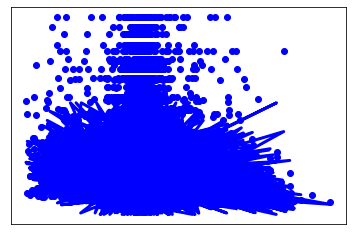

In [56]:
# Plot outputs
plt.plot(X_test, y_test, color="blue", ls="none", marker='.', ms=12)
plt.plot(X_test, y_predict_1, color="blue", linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()

# Report

***SVM***

MSE for SVM:  26.665

RMSE for SVM:  5.164


***KNN***

MSE for KNN Regression:  28.263

RMSE for KNN Regression:  5.316


***RandomForest***

MSE for RandomForest:  29.941

RMSE for RandomForest:  5.472

***Linear Regression***

MSE for Linear Regression:  30.807

RMSE for Linear Regression:  5.55

As, Support Vector Machine gives us least MSE.

# ***Conclusion***: 

Here I have carefully analyzed all this thing and I did experiment on all those points, and able achieve the best R2_score for that.

Strength Weaknesses of Our Pipeline:- 

   **Strength** >>
        Here we have used all the techniques which generalize our model for all the data points.
        We permform operations like 
        "Standardization on the data so that they are in same range"
            
            "Dimensionality reduction Using PCA (Principle Component Analysis) so that we can have the features with Highest Variance"
            
            "We trained our model with different algorithms like (Linear Regression, KNN Regression, DecisionTreeRegressor, SVM, Adaboost)"
            
            "We performed the Hyper-Parameter tunning to optimize the model"
            
            "We evaluate our model using Test dataset for all the algorithm"
            
            "We got R2_score for each model"
            


   **Weakness** >>
           Here It has been obeserved data, we got the error of "Irreducible Error". Our model is perfectly designed, pipeline is perfectly fitted, but Our data has some issues. I tried to optimized the issues and successed in the some. But              below are the some observations that i would like to highlight here,
           
            "Features are not Informative"
                  
            "Less data samples"
            
            "Less correlation between Independent and Dependant Variables"
          
            
Recommendation >> If our Domain Experty & Data Analyst team get the more data sampels then we could get the better performance for this pipeline.